# Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Training For Image

In [33]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\HP\OneDrive\Desktop\FarmEye_Portfolio\train',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64, 64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 3115 files belonging to 36 classes.


# Validation For Image

In [34]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\HP\OneDrive\Desktop\FarmEye_Portfolio\valid',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64, 64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 351 files belonging to 36 classes.


# Building Model

In [35]:
cnn = tf.keras.models.Sequential()

# Buliding Convolution Layer

In [36]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [37]:
# Do it again to reduce the size of matrix to just focus on important elements in image
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [38]:
cnn.add(tf.keras.layers.Flatten())

In [39]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu')) # Hidden layers

In [40]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu')) # Hidden layers

In [41]:
cnn.add(tf.keras.layers.Dropout(0.5)) # To avoid overfitting

In [42]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax')) # Output Layer

In [43]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                  

# Compiling and Training

In [44]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 37s 334ms/step - loss: 5.1111 - accuracy: 0.0417 - val_loss: 3.4339 - val_accuracy: 0.0940
Epoch 2/32
98/98 [==============================] - 33s 314ms/step - loss: 3.4196 - accuracy: 0.0616 - val_loss: 3.3362 - val_accuracy: 0.1197
Epoch 3/32
98/98 [==============================] - 31s 294ms/step - loss: 3.2783 - accuracy: 0.0761 - val_loss: 2.9277 - val_accuracy: 0.2023
Epoch 4/32
98/98 [==============================] - 32s 302ms/step - loss: 3.1303 - accuracy: 0.1185 - val_loss: 2.6988 - val_accuracy: 0.2849
Epoch 5/32
98/98 [==============================] - 31s 292ms/step - loss: 2.9127 - accuracy: 0.1705 - val_loss: 2.3195 - val_accuracy: 0.4074
Epoch 6/32
98/98 [==============================] - 31s 294ms/step - loss: 2.5976 - accuracy: 0.2645 - val_loss: 1.9175 - val_accuracy: 0.5071
Epoch 7/32
98/98 [==============================] - 31s 290ms/step - loss: 2.2135 - accuracy: 0.3830 - val_loss: 1.7334 - val_accuracy: 0.5755

# Saving Model

In [46]:
cnn.save('training_model.h5')

In [47]:
training_history.history # Return Dictionary of history

{'loss': [5.1111226081848145,
  3.4196090698242188,
  3.2782628536224365,
  3.1303048133850098,
  2.9127392768859863,
  2.597597360610962,
  2.2135074138641357,
  1.9299205541610718,
  1.5645538568496704,
  1.2864936590194702,
  1.096810221672058,
  0.8041285872459412,
  0.8737143874168396,
  0.6858355402946472,
  0.6087188124656677,
  0.5548797845840454,
  0.43247392773628235,
  0.431071937084198,
  0.41137486696243286,
  0.3200397193431854,
  0.3433704674243927,
  0.2634676694869995,
  0.28690317273139954,
  0.27837902307510376,
  0.30378785729408264,
  0.2571786642074585,
  0.23896780610084534,
  0.232127845287323,
  0.21845141053199768,
  0.22391892969608307,
  0.18055292963981628,
  0.14287342131137848],
 'accuracy': [0.041733548045158386,
  0.061637237668037415,
  0.0760834664106369,
  0.1184590682387352,
  0.17046548426151276,
  0.26452648639678955,
  0.38298556208610535,
  0.4430176615715027,
  0.555377185344696,
  0.6410914659500122,
  0.6908507347106934,
  0.7678972482681274,

In [48]:
# Recording the history of training in json file
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [49]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Calculating Model's accuracy of Validation set

In [51]:
print(f"Validation Accuracy: {training_history.history['val_accuracy'][-1] * 100} %")

Validation Accuracy: 94.87179517745972 %


# Accuracy Visualization

# Training Visualization

In [52]:
epochs = [i for i in range(1, 33)] 

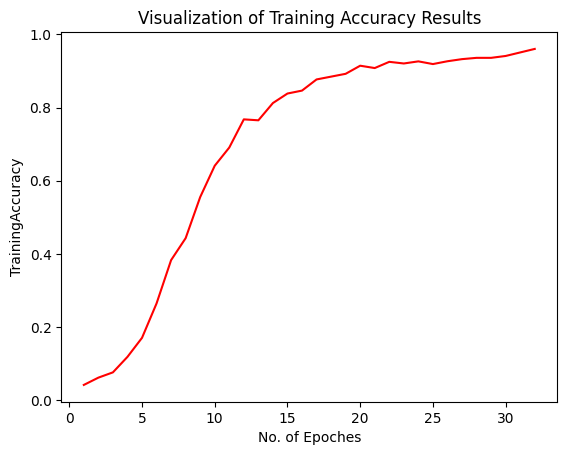

In [54]:
plt.plot(epochs, training_history.history['accuracy'], color='red')
plt.xlabel("No. of Epoches")
plt.ylabel("TrainingAccuracy")
plt.title("Visualization of Training Accuracy Results")
plt.show()

# Validation Accuracy

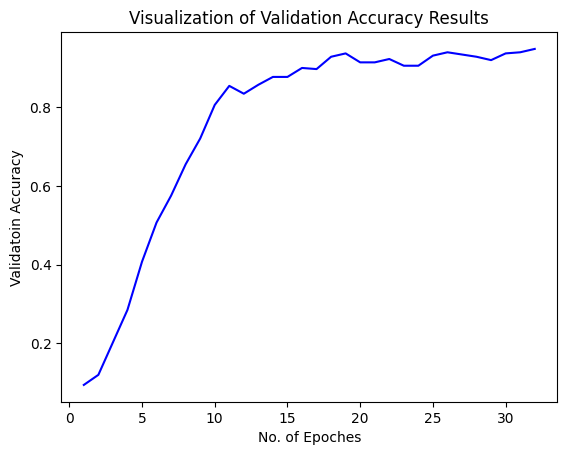

In [56]:
plt.plot(epochs, training_history.history['val_accuracy'], color='blue')
plt.xlabel('No. of Epoches')
plt.ylabel('Validatoin Accuracy')
plt.title('Visualization of Validation Accuracy Results')
plt.show()